In [4]:
import numpy as np
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = np.random.normal(0, 0.1, size=(num_visible, num_hidden))
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _gibbs_sampling(self, visible_prob):
        hidden_prob = self._sigmoid(np.dot(visible_prob, self.weights) + self.hidden_bias)
        hidden_state = np.random.binomial(1, hidden_prob)
        
        visible_prob_reconstructed = self._sigmoid(np.dot(hidden_state, self.weights.T) + self.visible_bias)
        visible_state_reconstructed = np.random.binomial(1, visible_prob_reconstructed)
        
        return hidden_prob, hidden_state, visible_prob_reconstructed, visible_state_reconstructed
    
    def train(self, data, learning_rate=0.1, num_epochs=100, k=1):
        num_samples = data.shape[0]
        for epoch in range(num_epochs):
            np.random.shuffle(data)
            error = 0
            for sample in data:
                visible_prob = sample
                for _ in range(k):
                    hidden_prob, _, visible_prob, _ = self._gibbs_sampling(visible_prob)
                positive_association = np.outer(sample, hidden_prob)
                negative_association = np.outer(visible_prob, self._sigmoid(np.dot(visible_prob, self.weights) + self.hidden_bias))
                
                self.weights += learning_rate * (positive_association - negative_association)
                self.visible_bias += learning_rate * (sample - visible_prob)
                self.hidden_bias += learning_rate * (hidden_prob - self._sigmoid(np.dot(visible_prob, self.weights) + self.hidden_bias))
                
                error += np.sum((sample - visible_prob)**2)
            
            print("Epoch %d, Reconstruction Error: %f" % (epoch+1, error/num_samples))
    
    def reconstruct(self, data):
        hidden_prob = self._sigmoid(np.dot(data, self.weights) + self.hidden_bias)
        reconstructed_data = self._sigmoid(np.dot(hidden_prob, self.weights.T) + self.visible_bias)
        return reconstructed_data
    
    def extract_features(self, data):
        hidden_prob = self._sigmoid(np.dot(data, self.weights) + self.hidden_bias)
        return hidden_prob

In [5]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train_bin = binarize(X_train.reshape(X_train.shape[0], -1), threshold=0.5)
X_test_bin = binarize(X_test.reshape(X_test.shape[0], -1), threshold=0.5)


In [6]:
num_visible = X_train_bin.shape[1]
num_hidden = 100  
rbm = RBM(num_visible, num_hidden)
rbm.train(X_train_bin, num_epochs=10)
reconstructed_data = rbm.reconstruct(X_test_bin)
features = rbm.extract_features(X_test_bin)

Epoch 1, Reconstruction Error: 8.716718
Epoch 2, Reconstruction Error: 8.802829
Epoch 3, Reconstruction Error: 8.697193
Epoch 4, Reconstruction Error: 8.777257
Epoch 5, Reconstruction Error: 8.623836
Epoch 6, Reconstruction Error: 8.645068
Epoch 7, Reconstruction Error: 8.208018
Epoch 8, Reconstruction Error: 8.042422
Epoch 9, Reconstruction Error: 8.152038
Epoch 10, Reconstruction Error: 8.196068


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

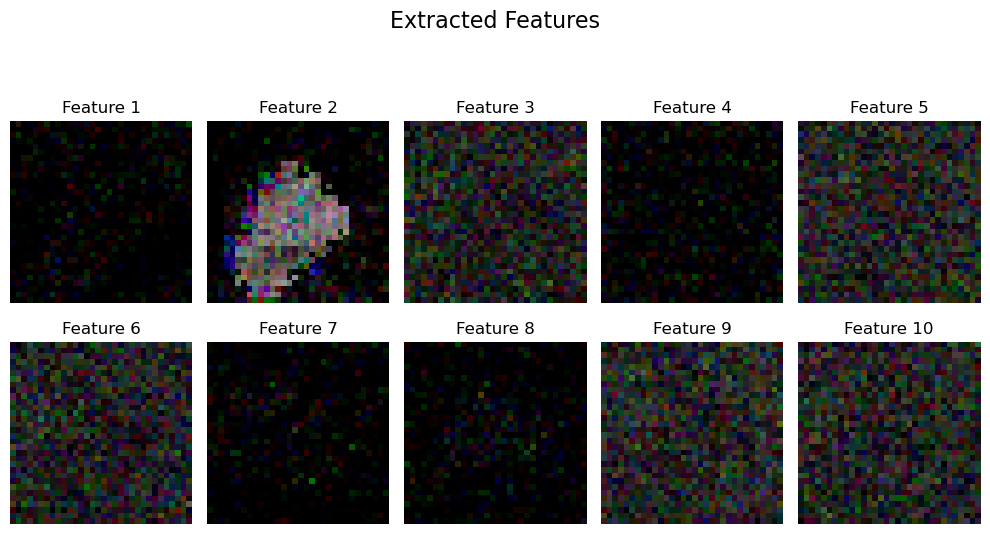

In [8]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(rbm.weights[:, i].reshape(32, 32, 3))
    plt.title(f'Feature {i+1}')
    plt.axis('off')
plt.suptitle('Extracted Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()